# Лабораторная работа №3: Регрессионный анализ
Выполнила студентка гр. 1384 Пчелинцева Кристина. Вариант №13

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

1) Линейная регрессия:
   $Y = X \cdot \beta + \epsilon$
   Где:
   
   $Y$ - вектор наблюдений,

   $X$ - матрица регрессоров,

   $\beta$ - вектор параметров,
   
   $\epsilon$ - вектор случайных ошибок.  


2) МНК (Метод Наименьших Квадратов)

   $RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

   Нормальные уравнения: $XX^{\intercal}\beta=XY$

   Решение системы нормальных уравнений в регулярном случае: $\widehat{\beta}=(XX^{\intercal})^{-1}XY$

   $RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}$

   $\frac{\partial RSS}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=\overline{1,m}$

3) Оценка хи-квадрат:
   $\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$
   Где:
   
   $E_i$ - ожидаемая частота,  
   
   $O_i$ - наблюдаемая частота.

  

4) Доверительные интервалы и доверительный эллипсоид:
   
   ДНО функции:$\psi=с^{\intercal}\beta$

   МНК-оценка: $\widehat{\psi}=с^{\intercal}\beta$

   Элемент дисперсии оценки: $b_{\psi}=c^{\intercal}(XX^{\intercal})^{-1}c$

   Распределение $\widehat{\psi}\sim \mathcal{N}(\psi,\sigma^{2}b)$

   $\frac{\widehat{\psi}-\psi}{S\sqrt{b}}\sim \mathcal{S}_{n-r}$

   Д.И. уровня доверия $1-\alpha: \left[ \widehat{\psi} - X_{\alpha}S\sqrt{b};\widehat{\psi} + X_{\alpha}S\sqrt{b} \right], где X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

5) Несмещённая оценка дисперсии: $(S^{2})$

   $S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

   $SS_{e}=RSS(\widehat{\beta})$, а r-ранг матрицы X

6) Уравнение 

   $A_{\alpha}=\left\{ \overrightarrow{X}:(\overrightarrow{X}-\widehat{\psi})^{\intercal}B^{-1}(\overrightarrow{X}-\widehat{\psi})\le qS^{2}X_{\alpha} \right\}$ представляет собой уравнение доверительного эллипсоида. Здесь:

   $\widehat{\psi}$ - вектор оценок параметров,
   
   $B$ - матрица оценок ковариации,
   
   $S^{2}$ - оценка дисперсии,
   
   q - пороговая точка, связанная с распределением хи-квадрат с \(n-r\) степенями свободы,
   
   $X_{\alpha}$ - значение функции распределения хи-квадрат с (n-r) степенями свободы и уровнем доверия $1-\alpha$.

7) Теорема Колмогорова

   $D_{n}(\overrightarrow{X}) = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_{i}) - F_{n}(X_{i})|$

   Если гипотеза $H_{0}$ верна, и $F_{0}(X)$ - непрерывная ф-я на $\mathbb R$, тогда имеет место сходимость

   $P(\sqrt{n} D_{n}(\overrightarrow{X}) < z) \xrightarrow[n \rightarrow \infty]{} K(z)$, где

   $K(z)=1-\alpha$ - ф-я распределения Колмогорова.

8) $\mathbb{F}$-критерий

   $\mathbb{F}=\frac{MSR}{MSE}$ - статистика распределения

   где $MSR=\frac{SSR}{p}=\frac{\sum_{i=1}^{n}\left(\sum_{j=1}^{n}x_{ji} \beta_j - \overline{Y}\right)^2}{p}$ - среднеквадратичное отклонение объясненных отклонений

   $MSE = \frac{SS_e}{n-p}=\frac{\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}}{n-p}, где SS_{e}=RSS(\beta)$ - среднеквадратичное отклонение остатков

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

In [65]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


Y = np.array([4.22, 2.33, 5.64, 6.31, 5.03, 9.05, 14.34, 10.62, 0.50, 21.23, 9.62, 4.52, 9.90,
     5.95, 0.30, 8.17, 7.97, 6.04, 11.63, 11.30, 10.14, 17.11, 17.99, 12.25, 5.84, 2.78,
     11.23, 18.07, 10.88, 11.76, 4.27, 7.73, 10.09, 11.10, 1.51, 1.76, 8.12, 1.94, 5.65, 
     13.77, 1.13, 7.01, 15.38, 6.04, 4.92, 4.67, 1.45, 8.13, 2.69, 5.39])
X = np.array([3, 5, 3, 2, 4, 6, 4, 4, 6, 1, 4, 5, 4, 5, 4, 5, 7, 2, 3, 5, 5, 5, 2, 4, 3, 
     2, 4, 4, 5, 4, 3, 4, 4, 4, 3, 5, 7, 2, 4, 4, 6, 6, 4, 4, 2, 4, 4, 6, 4, 3])
alpha = 0.05
h = 2.7
n = 50

### Задание 1.
Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметром сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

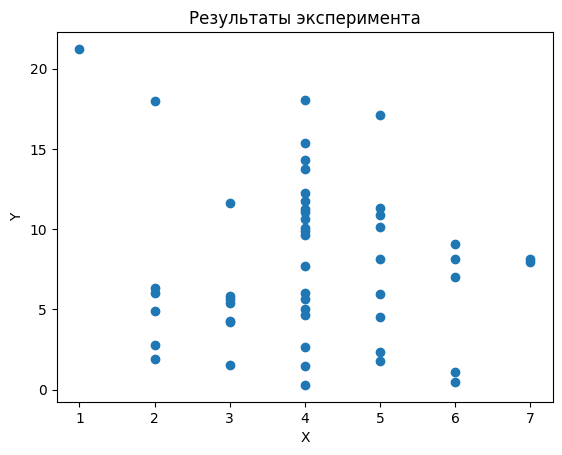

In [11]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты эксперимента')
plt.show()

Решим систему нормальных уравнений в нашем случае:
$$\hat{\beta} = \left(XX^{\intercal}\right)^{-1}XY$$

Масштаб сдвига = 9.490387007601942
Параметр сдвига = -0.389405666897028


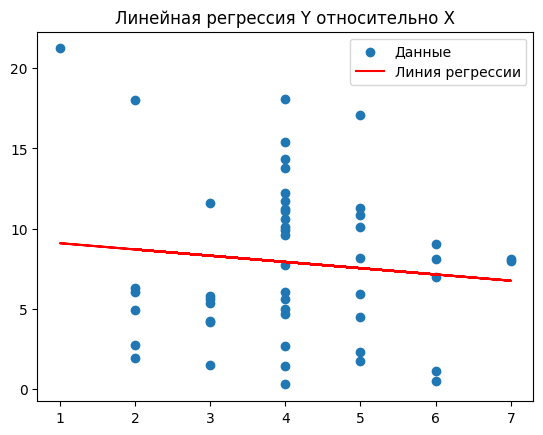

In [109]:
X_2nd = np.array([[1 for i in range(50)], X])
XX_2nd = np.dot(X_2nd, X_2nd.T)
inv = np.linalg.inv(XX_2nd)
b_2nd = np.dot(np.dot(inv, X_2nd), Y)
print(f"Масштаб сдвига = {b_2nd[0]}\nПараметр сдвига = {b_2nd[1]}")

plt.scatter(X, Y, label='Данные')
# Добавляем линию регрессии на график
plt.plot(X, b_2nd[1]*X+b_2nd[0], color='red', label='Линия регрессии')
plt.title('Линейная регрессия Y относительно X')
plt.legend()
plt.show()

$\beta_0 = 9.490387007601933$

$\beta_1 = -0.3894056668970282$


### Задача 2.
Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 2.20$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.05$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Построим несмещенную оценку дисперсии


$$ s^2 = \frac{RSS(\hat{\beta})}{n-r} $$



In [93]:
r = np.linalg.matrix_rank(X_2nd)

rss = 0
for i in range(0, len(Y)):
    temp = Y[i]
    for j in range(r):
        temp -= X_2nd[j][i]*b_2nd[j]
    rss += temp**2

disp = rss / (len(X) - r)
print(f"Несмещенная оценка дисперсии: {disp}")

Несмещенная оценка дисперсии: 25.01059119442526


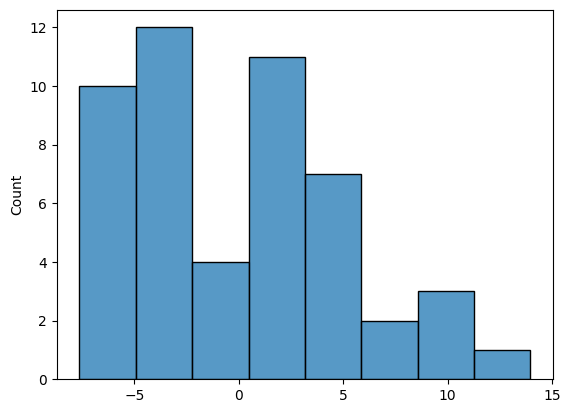

In [52]:
# Вычисляем ошибки
residuals = Y - (b_2nd[1]*X + b_2nd[0])

# Построение гистограммы ошибок
sns.histplot(residuals, bins=np.arange(min(residuals), max(residuals) + h, h))
plt.show()

Статистика хи-квадрат: 24.364444444444445
Критическое значение хи-квадрат при alpha=0.05: 15.507313055865453
Гипотеза о нормальности отклоняется

Статистика Колмогорова: 0.4308053921011116
p-значение: 6.008166933109134e-09
Оценка не соответствует нормальному распределению.
Максимальное расстояние полученной оценки до класса нормального распределения: 0.4308053921011116


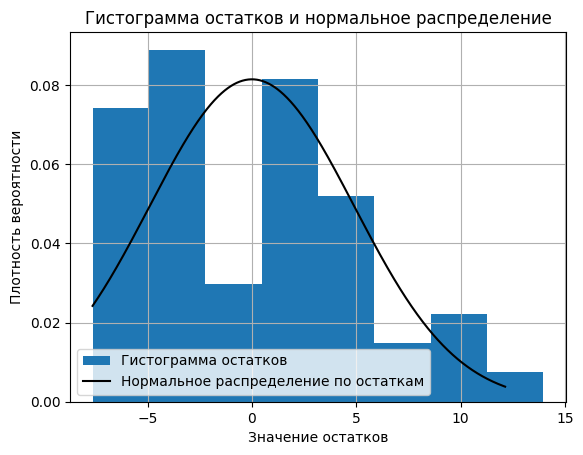

In [60]:
# Проверка гипотезы нормальности ошибок с помощью теста хи-квадрат
alpha = 0.05
hist, bin_edges = np.histogram(errors, bins=np.arange(min(errors), max(errors) + h, h))
expected = len(errors) / len(bin_edges)  # Ожидаемое количество значений в каждом бине
chi_square_stat = np.sum(((hist - expected) ** 2) / expected)
chi_square_critical = chi2.ppf(1 - alpha, len(bin_edges) - 1)  # Критическое значение хи-квадрат

print(f"Статистика хи-квадрат: {chi_square_stat}")
print(f"Критическое значение хи-квадрат при alpha={alpha}: {chi_square_critical}")
if chi_square_stat > chi_square_critical:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")



#Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову:
ks, p_value = stats.kstest(residuals, 'norm')
print("\nСтатистика Колмогорова:", ks)
print("p-значение:", p_value)
if p_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")
print(f"Максимальное расстояние полученной оценки до класса нормального распределения: {ks}")

# Гистограмма остатков
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), density=True, label='Гистограмма остатков')

x = np.linspace(min(residuals), max(residuals), 1000)

# Вычисляем значения плотности вероятности для нормального распределения
pdf = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))

# Строим график плотности вероятности нормального распределения на основе остатков
plt.plot(x, pdf, 'k-', label='Нормальное распределение по остаткам')

plt.xlabel('Значение остатков')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма остатков и нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

### Задание 3.
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha$. Построить доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$. (вычислить его полуоси)

$\psi = C^T \beta $

$ b_\psi = C^T (XX^T)^{-1}C$

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

$ \widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi +x_{\alpha}s\sqrt{b} $ - доверительный интервал для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_0 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(1,1) $

In [134]:
## Д.И. для b0

x_a = func.ppf(1 - alpha/2)
print("Квантиль x_a = ", x_a)

c_0 = np.array([1 , 0])
b_0 = np.dot(np.dot(c_0.T, inv), c_0) ## элемент дисперсии оценки
c_1 = np.array([0, 1])
b_1 = np.dot(np.dot(c_1.T, inv), c_1)

print("b_0 =", b_0)
print("b_1 =",b_1)



Квантиль x_a =  3.9874764628345414
b_0 = 0.2098594793826308
b_1 = 0.011518083390923754


In [96]:
x_a = 2.0106347546964454
b = 0.011518083390923754

left = b_2nd[0] - x_a * np.sqrt(disp) * np.sqrt(b)
right = b_2nd[0] + x_a * np.sqrt(disp) * np.sqrt(b)
print("Доверительный интервал для betta_0 [{}; {}] уровня доверия {}".format(left, right, 1-alpha))

Доверительный интервал для betta_0 [8.411228414424732; 10.569545600779152] уровня доверия 0.95


Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right]  \to 8.411 \le \psi_{b_0} \le 10.569$

Для $\beta_1:$

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} $, $\widehat \psi = \widehat \beta_1 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(2,2) $

In [101]:
x_a = 2.0106347546964454
b = 0.011518083390923754

left = b_2nd[1] - x_a * np.sqrt(disp) * np.sqrt(b)
right = b_2nd[1] + x_a * np.sqrt(disp) * np.sqrt(b)
print("Доверительный интервал для betta_0 [{}; {}] уровня доверия {}".format(left, right, 1-alpha))

Доверительный интервал для betta_0 [-1.4685642600742377; 0.6897529262801816] уровня доверия 0.95


Д.И - $\left[\hat{\psi} - x_{\alpha}\mathrm{s}\sqrt{b}; \hat{\psi} + x_{\alpha}\mathrm{s}\sqrt{b} \right]  \to -1.46856 \le \psi_{b_0} \le 0.68975$

Построим доверительный эллипс

Доверительный эллипсойд уровня доверия $1 -\alpha$ функции параметра $\psi$:

$$ \mathrm{A}_{\alpha} = \left\{\vec{x}:(\vec{x}-\hat{\psi})^{\intercal}\mathrm{B}^{-1}(\vec{x}-\hat{\psi}) \leq \mathrm{q}\mathrm{s}^2\mathrm{x}_{\alpha}\right\} $$ 
где $\mathrm{x}_{\alpha}: \mathrm{F}_{q, n-r}(\mathrm{x}_{\alpha})=1-\alpha$

$\psi = C^T \beta $

$ b_\psi = C^T (XX^T)^{-1}C$

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

$ \widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi +x_{\alpha}s\sqrt{b} $ - доверительный интервал для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_0 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(1,1) $

In [102]:
eigenvalues, eigenvectors = np.linalg.eig(inv)
print("Собственные числа:")
print(eigenvalues)
print("\nСобственные векторы:")
print(eigenvectors.T)
print("\nМатрица перехода:")
print(eigenvectors)
print("\nПроверка")
print(np.dot(inv, eigenvectors.T[0]))
print(np.dot(0.22033204, eigenvectors.T[0]))
print("\nbeta")
print(b_2nd[0], b_2nd[1])

func = stats.f(2, n - 2)
x_a = func.ppf(1 - alpha)
print("\nКвантиль x_a =", x_a)

print("\nБольшая полуось:")
print(2 * disp * x_a / 0.22033204)

print("Малая полуось:")
print(2 * disp * x_a / 0.00104552)

Собственные числа:
[0.22033204 0.00104552]

Собственные векторы:
[[ 0.97582917 -0.21853476]
 [ 0.21853476  0.97582917]]

Матрица перехода:
[[ 0.97582917  0.21853476]
 [-0.21853476  0.97582917]]

Проверка
[ 0.21500643 -0.04815021]
[ 0.21500643 -0.04815021]

beta
9.490387007601942 -0.389405666897028

Квантиль x_a = 3.190727335928499

Большая полуось:
724.3792324691887
Малая полуось:
152655.094138391


In [111]:
eigenvalues, eigenvectors = np.linalg.eig(XX_2nd)
print("Собственные числа:")
print(eigenvalues)
print("\nСобственные векторы:")
print(eigenvectors.T)
print("\nМатрица перехода:")
print(eigenvectors)
print("\nПроверка")
print(np.dot(XX_2nd, eigenvectors.T[0]))
print(np.dot(4.53860451, eigenvectors.T[0]))
print("\nbeta")
print(b_2nd[0], b_2nd[1])

func = stats.f(2, n - 2)
x_a = func.ppf(1 - alpha)
print("\nКвантиль x_a =", x_a)

print("\nБольшая полуось:")
print(2 * 25.01059119 * 3.1907273359 /  4.53860451)

print("Малая полуось:")
print(2 * 25.01059119 * 3.1907273359 / 956.46139549)

Собственные числа:
[  4.53860451 956.46139549]

Собственные векторы:
[[-0.97582917  0.21853476]
 [-0.21853476 -0.97582917]]

Матрица перехода:
[[-0.97582917 -0.21853476]
 [ 0.21853476 -0.97582917]]

Проверка
[-4.42890265  0.99184283]
[-4.42890265  0.99184283]

beta
9.490387007601942 -0.389405666897028

Квантиль x_a = 3.190727335928499

Большая полуось:
35.16586511167624
Малая полуось:
0.1668692063751716


$ \begin{pmatrix} x\\ y \end{pmatrix} =  \begin{pmatrix} -0.97582917 && -0.21853476\\ 0.21853476 && -0.97582917 \end{pmatrix} \cdot \begin{pmatrix} 9.490387007601942 - \beta_0\\ -0.389405666897028 - \beta_1 \end{pmatrix} = \begin{pmatrix} -9.09605852 + 0.97582917\beta_0 + 0.21853476\beta_1\\ 2.45397285 - 0.21853476\beta_0 + 0.97582917\beta_1 \end{pmatrix} $


Уравнение эллипса:

$\cfrac{4.53860451}{2 \cdot 25.01059119 \cdot 3.1907273} \cdot x^2 + \cfrac{956.46139549}{2 \cdot 25.01059119 \cdot 3.1907273}\cdot y^2 \le 1 $


$\cfrac{4.53860451}{2 \cdot 25.01059119 \cdot 3.1907273} \cdot (-9.09605852 + 0.97582917\beta_0 + 0.21853476\beta_1)^2 + \cfrac{956.46139549}{2 \cdot 25.01059119 \cdot 3.1907273}\cdot (2.45397285 - 0.21853476\beta_0 + 0.97582917\beta_1)^2 \le 1 $

Найдём полуоси эллипса:

Большая полуось = $ \cfrac{2 \cdot 25.01059119 \cdot 3.1907273 }{4.53860451} = 35.1658$

Малая полуось = $ \cfrac{2 \cdot 25.01059119 \cdot 3.1907273 }{956.46139549} = 0.166869 $



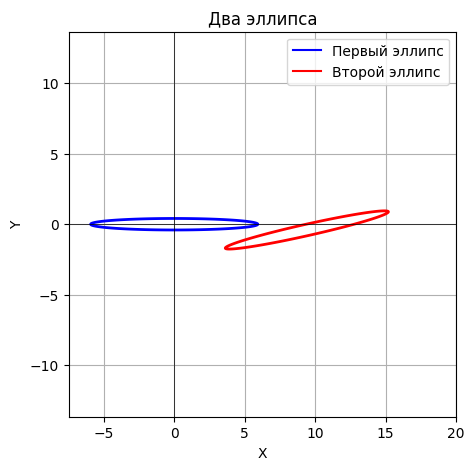

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Параметры первого эллипса
a1 = np.sqrt(4.53860451 / (2 * disp * x_a))
b1 = np.sqrt(956.46139549 / (2 * disp * x_a))

# Уравнение первого эллипса
def first_ellipse_equation(x, y):
    return x**2 * a1**2 + y**2 * b1**2

# Уравнение второго эллипса в терминах beta_0 и beta_1
def second_ellipse_equation(beta0, beta1):
    return ((-9.09605852 + 0.97582917*beta0 + 0.21853476*beta1) ** 2) * a1**2 + \
           ((2.45397285 - 0.21853476*beta0 + 0.97582917*beta1) ** 2) * b1**2

# Генерация данных для построения графика
x_vals = np.linspace(-7.5, 20, 400)
y_vals = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x_vals, y_vals)
Z1 = first_ellipse_equation(x, y)
Z2 = second_ellipse_equation(x, y)

# Построение графика
plt.figure(figsize=(5, 5))

# Первый эллипс
contour1 = plt.contour(x, y, Z1, levels=[1], colors='blue', linewidths=2)
plt.plot([], [], color='blue', label='Первый эллипс')

# Второй эллипс
contour2 = plt.contour(x, y, Z2, levels=[1], colors='red', linewidths=2)
plt.plot([], [], color='red', label='Второй эллипс')

# Добавление легенды
plt.legend()

plt.title('Два эллипса')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.show()

### 4. Сформулировать гипотезу независимости переменной Y от переменной Х. Провести проверку значимости.

In [121]:
from scipy.stats import f

# наивная оценка
b_naiv = np.mean(Y)
msr = (np.sum((b_naiv - Y)**2) - rss)/r
mse = disp

F = msr / mse  # вычисляем значение F-критерия

F_critical = f.ppf(1 - alpha, r, len(X) - r)  # критическое значение F-критерия
print("F-критерий",F)
print("Критическое значение F =",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.")

F-критерий 0.2631905932419921
Критическое значение F = 3.190727335928499
Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.


### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Параметры = [10.973717138300463, -1.1986004608026486, 0.0989023453654206]


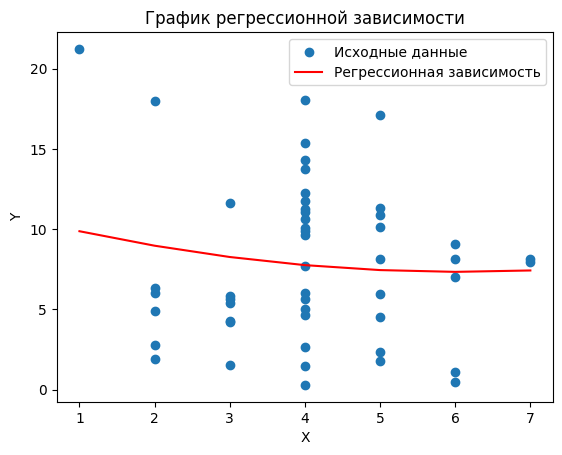

In [146]:
data_x_3nd = np.array([np.ones(50), X, np.square(X)])
XX_T_1 = np.dot(data_x_3nd, data_x_3nd.T)
inv_3nd = np.linalg.pinv(XX_T_1)
b_3nd = np.dot(np.dot(inv_3nd, data_x_3nd), Y)

print(f"Параметры = [{b_3nd[0]}, {b_3nd[1]}, {b_3nd[2]}]")

x_range = np.array(sorted(X))

plt.scatter(X, Y, label='Исходные данные')

plt.plot(x_range, b_3nd[0] + b_3nd[1] * x_range + b_3nd[2] * x_range**2, color='red', label='Регрессионная зависимость')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График регрессионной зависимости')
plt.legend()

plt.show()

$\beta_0 = 10.973717138$

$\beta_1 = -1.19860046$

$\beta_2 = 0.098902345$


### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [137]:
r = np.linalg.matrix_rank(data_x_3nd)

rss = 0
for i in range(0, len(Y)):
    temp = Y[i]
    for j in range(r):
        temp -= data_x_3nd[j][i]*b_3nd[j]
    rss += temp**2

disp_1 = rss / (len(X) - r)
print(f"Несмещенная оценка дисперсии: {disp_1}")

Несмещенная оценка дисперсии: 25.4843011444639


$ s^2 = 25.4843011444639 $

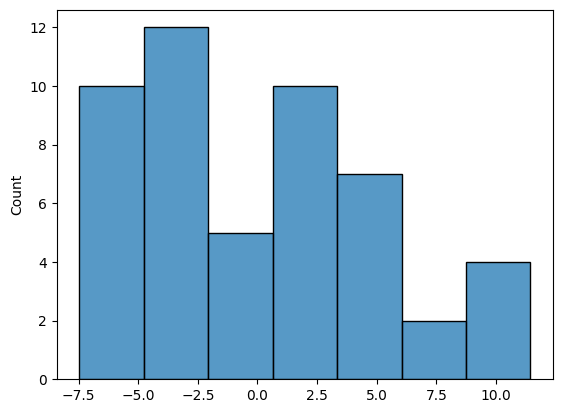

In [138]:
# Вычисляем ошибки
residuals = Y - (b_3nd[2]*np.square(X) + b_3nd[1]*X + b_3nd[0])

# Построение гистограммы ошибок
sns.histplot(residuals, bins=np.arange(min(residuals), max(residuals) + h, h))
plt.show()

P-значение: 0.2740155530350467
Нет оснований отвергнуть гипотезу о нормальности ошибок

Статистика Колмогорова: 0.4226461720703943
p-значение: 1.2913472468085052e-08
Оценка не соответствует нормальному распределению.
Максимальное расстояние полученной оценки до класса нормального распределения: 0.4226461720703943


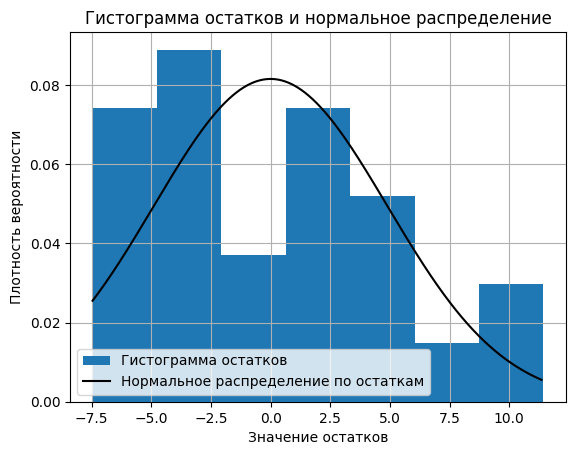

In [139]:
p_value = stats.normaltest(residuals).pvalue
print(f"P-значение: {p_value}")
if p_value < alpha:
    print("Отвергаем гипотезу о нормальности ошибок")
else:
    print("Нет оснований отвергнуть гипотезу о нормальности ошибок")

#Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову:
ks, p_value = stats.kstest(residuals, 'norm')
print("\nСтатистика Колмогорова:", ks)
print("p-значение:", p_value)
if p_value < alpha:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")
print(f"Максимальное расстояние полученной оценки до класса нормального распределения: {ks}")

# Гистограмма остатков
plt.hist(residuals, bins=np.arange(min(residuals), max(residuals) + h, h), density=True, label='Гистограмма остатков')

x = np.linspace(min(residuals), max(residuals), 1000)

# Вычисляем значения плотности вероятности для нормального распределения
pdf = stats.norm.pdf(x, np.mean(residuals), np.std(residuals))

# Строим график плотности вероятности нормального распределения на основе остатков
plt.plot(x, pdf, 'k-', label='Нормальное распределение по остаткам')

plt.xlabel('Значение остатков')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма остатков и нормальное распределение')
plt.legend()
plt.grid(True)
plt.show()

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1- \alpha$.

$\psi = C^T \beta $

$ b_\psi = C^T (XX^T)^{-1}C$

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ P_\theta(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha) = 1 -\alpha $

$ \widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi +x_{\alpha}s\sqrt{b} $ - доверительный интервал для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_0 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(1,1) $

In [140]:
## Д.И. для b0
func = stats.t(n - 3)
x_a = func.ppf(1 - alpha/2)
print("Квантиль x_a = ", x_a)

c_0 = np.array([1, 0, 0])
c_1 = np.array([0, 1, 0])
c_2 = np.array([0, 0, 1])
b_0 = np.dot(np.dot(c_0.T, inv_3nd), c_0) ## элемент дисперсии оценкиc_1 = np.array([0, 1])
b_1 = np.dot(np.dot(c_1.T, inv_3nd), c_1)
b_2 = np.dot(np.dot(c_2.T, inv_3nd), c_2)

print("b_0 =", b_0)
print("b_1 =", b_1)
print("b_2 =", b_2)

Квантиль x_a =  2.0117405104757546
b_0 = 1.01105728520546
b_1 = 0.24995323053907245
b_2 = 0.003561863689176288


In [141]:
x_a = 2.0117405104757546
b = 1.01105728520546

left = b_3nd[0] - x_a * np.sqrt(disp_1) * np.sqrt(b)
right = b_3nd[0] + x_a * np.sqrt(disp_1) * np.sqrt(b)
print("Доверительный интервал для betta_0 [{}; {}] уровня доверия {}".format(left, right, 1-alpha))

Доверительный интервал для betta_0 [0.7620604152839956; 21.185373861316933] уровня доверия 0.95



Для $\beta_1:$

$ C = \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} $, $\widehat \psi = \widehat \beta_1 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(2,2) $

In [143]:
x_a = 2.0117405104757546
b = 0.24995323053907245

left = b_3nd[1] - x_a * np.sqrt(disp_1) * np.sqrt(b)
right = b_3nd[1] + x_a * np.sqrt(disp_1) * np.sqrt(b)
print("Доверительный интервал для betta_1 [{}; {}] уровня доверия {}".format(left, right, 1-alpha))

Доверительный интервал для betta_1 [-6.275957484841315; 3.878756563236018] уровня доверия 0.95



Для $\beta_2:$

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} $, $\widehat \psi = \widehat \beta_1 $, $b$ - элемент в матрице $ (XX^T)^{-1}$ на позиции $(3,3) $

In [144]:
x_a = 2.0117405104757546
b = 0.003561863689176288

left = b_3nd[2] - x_a * np.sqrt(disp_1) * np.sqrt(b)
right = b_3nd[2] + x_a * np.sqrt(disp_1) * np.sqrt(b)
print("Доверительный интервал для betta_2 [{}; {}] уровня доверия {}".format(left, right, 1-alpha))

Доверительный интервал для betta_2 [-0.5072014077075413; 0.7050060984383826] уровня доверия 0.95


Доверительный эллипсоид уровня доверия 1 - $\alpha$

$ A_\alpha = \{x: (x - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, где

$ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$

$ Для \; (\beta_0, \beta_1)$

$C = \begin{pmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.

Тогда уравнение доверительного эллипсоида выглядит таким образом:

$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2 \le qs^2x_\alpha$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 + \cfrac{\lambda_3}{qs^2x_\alpha}z^2 \le 1$

In [148]:
eigenvalues, eigenvectors = np.linalg.eig(XX_T_1)
print("Собственные числа:")
print(eigenvalues)
print("{:f}".format(eigenvalues[0]), "{:f}".format(eigenvalues[1]), "{:f}".format(eigenvalues[2]))
print("\nСобственные векторы:")
print(eigenvectors.T)
print("\nМатрица перехода:")
print(eigenvectors)

print("\nbeta")
print(b_3nd[0], b_3nd[1], b_3nd[2])

func = stats.f(3, n - 2)
x_a = func.ppf(1 - alpha)
print("\nКвантиль x_a =", x_a)

Собственные числа:
[2.35866606e+04 8.00617805e-01 6.45387855e+01]
23586.660597 0.800618 64.538785

Собственные векторы:
[[-0.03960947 -0.19105503 -0.98077983]
 [-0.8983857   0.43649386 -0.04874669]
 [-0.43741767 -0.87918774  0.18893039]]

Матрица перехода:
[[-0.03960947 -0.8983857  -0.43741767]
 [-0.19105503  0.43649386 -0.87918774]
 [-0.98077983 -0.04874669  0.18893039]]

beta
10.973717138300463 -1.1986004608026486 0.0989023453654206

Квантиль x_a = 2.79806063543561


$ \begin{pmatrix} x\\ y\\ z \end{pmatrix} =  \begin{pmatrix} -0.03960947 & -0.8983857 & -0.43741767\\ -0.19105503 & 0.43649386 & -0.87918774\\ -0.98077983 & -0.04874669 & 0.18893039 \end{pmatrix} \cdot \begin{pmatrix} 10.973717138300463 - \beta_0\\ 1.1986004608026486 - \beta_1 \\ 0.0989023453654206 - \beta_2  \end{pmatrix} = \begin{pmatrix} -1.468207 + 0.03960947\beta_0 + 0.8983857\beta_1 - 0.43741767\beta_2 \\ 2.532811869 - 0.19105503\beta_0 - 0.43649386\beta_1 + 0.87918774 \beta_2 \\ -10.802542575 + 0.98077983\beta_0 + 0.04874669\beta_1 - 0.18893039 \beta_2  \end{pmatrix} $

Уравнение эллипса:

$\cfrac{23586.6606}{3 \cdot 25.4843011444639 \cdot 2.798} \cdot x^2 + \cfrac{80.0617805}{3 \cdot 25.4843011444639 \cdot 2.798}\cdot y^2 + \cfrac{64.5387855}{3 \cdot 25.4843011444639 \cdot 2.798}\cdot z^2 \le 1 $

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной Х и проверить её значимость на уровне $\alpha$.

In [152]:
# наивная оценка
b_naiv = np.mean(Y)
msr = (np.sum((b_naiv - Y)**2) - rss)/r
mse = disp_1

F = msr / mse  # вычисляем значение F-критерия

F_critical = f.ppf(1 - alpha, r, len(X) - r)  # критическое значение F-критерия
print("F-критерий",F)
print("Критическое значение F =",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.")

F-критерий 0.2081193453177239
Критическое значение F = 2.80235517609617
Не отвергаем нулевую гипотезу. Нет значимой зависимости между Y и X.


## Выводы

В ходе данной лабораторной работы была построена модель линейной регрессии переменной Y от переменной X. Используя метод наименьших квадратов (МНК), были получены оценки параметров сдвига и масштаба. Построена линия регрессии, которая демонстрирует характер зависимости между переменными.
Построена несмещённая оценка дисперсии и проверена гипотеза о нормальности ошибок на уровне значимости хи-квадрат. Оценено расстояние полученной оценки до класса нормальных распределений по Колмогорову.  
Построены доверительные интервалы для параметров с уровнем доверия 1 - α. Также построен доверительный эллипс уровня доверия 1 - α для выбранных параметров.  
Сформулирована и проведена проверка гипотезы о независимости переменной Y от переменной X на соответствующем уровне значимости.
Предложена и исследована модель, включающая дополнительный член с $X^2$. Были получены МНК оценки параметров в данной модели и изображена регрессионная зависимость.  